In [2]:
Im = 
function FrostImages = frost_filter(Im, n, a)
    % Frost Filter for image processing
    % Inputs:
    %   Im - Input image matrix
    %   n  - Neighborhood size (radius)
    %   a  - Damping factor for the filter
    
    % Get the dimensions of the input image
    dim = size(Im);
    deadpixel = 0;
    
    %% Local values
    E = localMean(Im, n);            % Local mean
    V = localVariance(Im, E, n);     % Local variance
    Speckle_index = V ./ (E .^ 2);   % Local speckle index
    clear V E % Clear memory
    
    %% Frost filter code
    A_sum = zeros(dim);  % Initialize accumulation matrix
    weight = zeros(dim); % Initialize weight matrix

    % Loop through the horizontal displacements
    for k = -n:n
        if k < 0
            Ah = padarray(Im(:, 1:dim(2)-abs(k)), [0 abs(k)], 'pre');
        elseif k > 0
            Ah = padarray(Im(:, 1+k:dim(2)), [0 k], 'post');
        else
            Ah = Im;
        end

        % Loop through the vertical displacements
        for i = -n:n
            if i < 0
                Av = padarray(Ah(1:dim(1)-abs(i), :), [abs(i) 0], 'pre');
            elseif i > 0
                Av = padarray(Ah(1+i:dim(1), :), [i 0], 'post');
            else
                Av = Ah;
            end

            % Update the accumulated sum and weight
            A_sum = A_sum + Av .* exp(-Speckle_index .* a .* sqrt(k^2 + i^2));
            weight = weight + exp(-Speckle_index .* a .* sqrt(k^2 + i^2));
        end
    end

    clear Speckle_index Av Ah % Clear memory

    %% Create the new image
    Im = A_sum ./ weight;
    clear A_sum weight % Clear memory

    % Assign dead pixels
    Im(dim(1)-n+1:dim(1), :) = deadpixel;
    Im(1:n, :) = deadpixel;
    Im(:, dim(2)-n+1:dim(2)) = deadpixel;
    Im(:, 1:n) = deadpixel;

    %% Return Filtered image
    FrostImages = Im;
end

function E = localMean(Im, n)
    % Compute the local mean of the image
    % Inputs:
    %   Im - Input image matrix
    %   n  - Neighborhood size (radius)
    % Output:
    %   E  - Local mean matrix
    kernel = ones(2*n+1, 2*n+1) / (2*n+1)^2;
    E = conv2(Im, kernel, 'same');
end

function V = localVariance(Im, E, n)
    % Compute the local variance of the image
    % Inputs:
    %   Im - Input image matrix
    %   E  - Local mean matrix
    %   n  - Neighborhood size (radius)
    % Output:
    %   V  - Local variance matrix
    kernel = ones(2*n+1, 2*n+1) / (2*n+1)^2;
    E2 = conv2(Im.^2, kernel, 'same');
    V = E2 - E.^2;
end


SyntaxError: invalid syntax (1872456142.py, line 1)

In [4]:
% Step 1: Read an image from a file
Im = imread('sar_image.jpg');

% Step 2: Display the image (optional)
figure;
imshow(Im);
title('Original Image');

% Step 3: Convert to grayscale (if the image is in color)
if size(Im, 3) == 3 % Check if the image has 3 channels (RGB)
    Im = rgb2gray(Im);
    figure;
    imshow(Im);
    title('Grayscale Image');
end

% Now you have the image matrix 'Im' that you can pass to the frost_filter function
n = 3; % Example neighborhood size
a = 1; % Example damping factor

% Apply the Frost filter
FrostImages = frost_filter(Im, n, a);

% Display the filtered image
figure;
imshow(FrostImages, []);
title('Filtered Image');


SyntaxError: expected 'else' after 'if' expression (3374267437.py, line 10)

In [ ]:
pip install numpy opencv-python matplotlib

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 6.9 MB/s eta 0:00:06
   ---------------------------------------- 0.4/38.8 MB 5.4 MB/s eta 0:00:08
    --------------------------------------- 0.6/38.8 MB 4.7 MB/s eta 0:00:09
   - -------------------------------------- 1.0/38.8 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.8 MB 6.7 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.8 MB 6.7 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.8 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.8 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.2/38.8 MB 6.5 MB/s eta 0:00:06
   ---- ----------------------------------- 4.1/38.8 MB 7.8 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/38.8 MB 7.8 MB/s eta 0:00:05
   ----- ---------------------------------- 5.0/38.8 MB 8.0 MB/s eta 0:00:05
   ---

C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:21: RuntimeWarning: divide by zero encountered in divide
  Speckle_index = V / (E**2)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:44: RuntimeWarning: invalid value encountered in multiply
  factor = np.exp(-Speckle_index * a * dist)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:67: RuntimeWarning: divide by zero encountered in divide
  C = V / (E**2)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:70: RuntimeWarning: divide by zero encountered in divide
  Cu = sigma**2 / (E**2)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:73: RuntimeWarning: invalid value encountered in divide
  W = Cu / (Cu + C)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:95: RuntimeWarning: divide by zero encountered in divide
  Cu = sigma**2 / (E**2)
C:\Users\dell\AppData\Local\Temp\ipykernel_11780\3046325134.py:98: RuntimeWarning: divide by zero encountered in divide

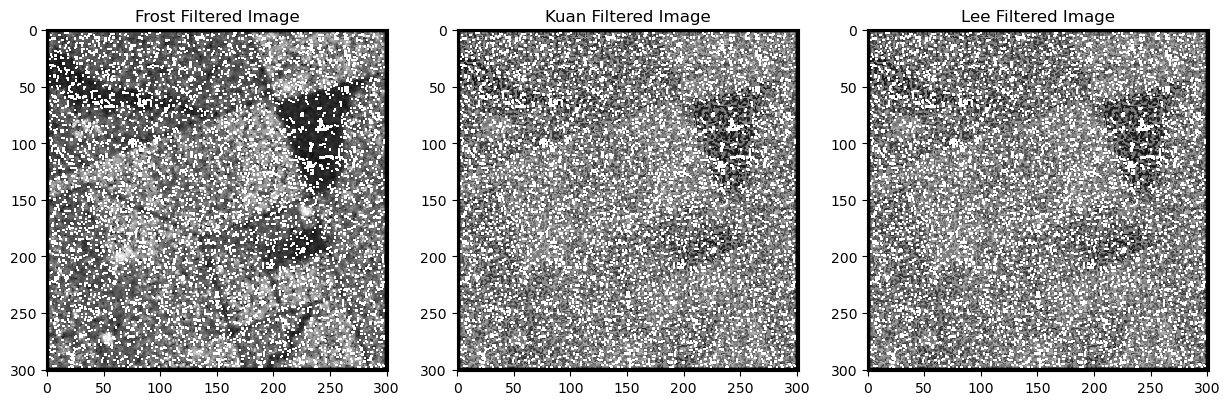

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def localMean(Im, n):
    kernel = np.ones((2*n+1, 2*n+1), np.float32) / (2*n+1)**2
    return cv2.filter2D(Im, -1, kernel)

def localVariance(Im, E, n):
    kernel = np.ones((2*n+1, 2*n+1), np.float32) / (2*n+1)**2
    E2 = cv2.filter2D(Im**2, -1, kernel)
    return E2 - E**2

def frost_filter(Im, n, a):
    dim = Im.shape
    deadpixel = 0
    
    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)
    Speckle_index = V / (E**2)
    
    A_sum = np.zeros(dim)
    weight = np.zeros(dim)

    # Frost filter code
    for k in range(-n, n+1):
        if k < 0:
            Ah = np.pad(Im[:, :dim[1]-abs(k)], ((0, 0), (abs(k), 0)), mode='constant')
        elif k > 0:
            Ah = np.pad(Im[:, k:dim[1]], ((0, 0), (0, k)), mode='constant')
        else:
            Ah = Im

        for i in range(-n, n+1):
            if i < 0:
                Av = np.pad(Ah[:dim[0]-abs(i), :], ((abs(i), 0), (0, 0)), mode='constant')
            elif i > 0:
                Av = np.pad(Ah[i:dim[0], :], ((0, i), (0, 0)), mode='constant')
            else:
                Av = Ah

            dist = np.sqrt(k**2 + i**2)
            factor = np.exp(-Speckle_index * a * dist)
            A_sum += Av * factor
            weight += factor

    Im_filtered = A_sum / weight

    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel

    return Im_filtered

def kuan_filter(Im, n, sigma):
    dim = Im.shape
    deadpixel = 0

    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)

    # Coefficient of Variation
    C = V / (E**2)
    
    # Noise Variance
    Cu = sigma**2 / (E**2)
    
    # Filter weight
    W = Cu / (Cu + C)
    
    # Filtered image
    Im_filtered = E + W * (Im - E)
    
    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel
    
    return Im_filtered

def lee_filter(Im, n, sigma):
    dim = Im.shape
    deadpixel = 0
    
    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)

    # Noise Variance
    Cu = sigma**2 / (E**2)
    
    # Filter weight
    W = Cu / (Cu + V / E**2)
    
    # Filtered image
    Im_filtered = E + W * (Im - E)
    
    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel
    
    return Im_filtered

# Step 1: Read an image from a file
Im = cv2.imread('sar_image.jpg', cv2.IMREAD_GRAYSCALE)
#Im = cv2.imread('sar_image.jpg')

# Step 2: Display the image (optional)
cv2.imshow('Original Image', Im)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step 3: Convert to grayscale (if the image is in color)
# (Not needed since we already read it in grayscale)

# Example parameters
n = 3
a = 1
sigma = 25  # Example noise standard deviation

# Apply the Frost filter
FrostImages = frost_filter(Im, n, a)

# Apply the Kuan filter
KuanImages = kuan_filter(Im, n, sigma)

# Apply the Lee filter
LeeImages = lee_filter(Im, n, sigma)

# Display the filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(FrostImages, cmap='gray')
plt.title('Frost Filtered Image')

plt.subplot(1, 3, 2)
plt.imshow(KuanImages, cmap='gray')
plt.title('Kuan Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(LeeImages, cmap='gray')
plt.title('Lee Filtered Image')

plt.show()


In [ ]:
epsilon = 1e-10  # Small constant to avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        Speckle_index = V / (E**2 + epsilon)

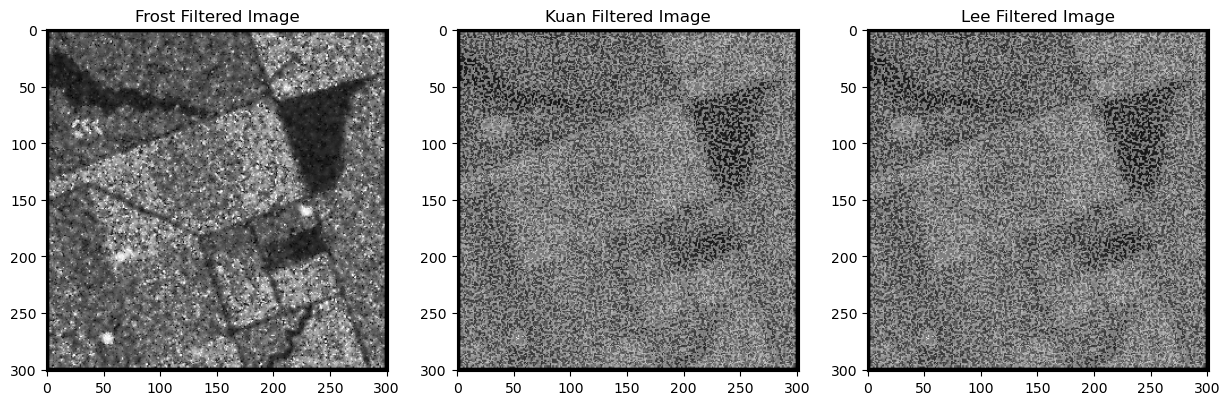

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def localMean(Im, n):
    kernel = np.ones((2*n+1, 2*n+1), np.float32) / (2*n+1)**2
    return cv2.filter2D(Im, -1, kernel)

def localVariance(Im, E, n):
    kernel = np.ones((2*n+1, 2*n+1), np.float32) / (2*n+1)**2
    E2 = cv2.filter2D(Im**2, -1, kernel)
    return E2 - E**2

def frost_filter(Im, n, a):
    dim = Im.shape
    deadpixel = 0
    
    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)
    
    epsilon = 1e-10  # Small constant to avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        Speckle_index = V / (E**2 + epsilon)
    
    A_sum = np.zeros(dim)
    weight = np.zeros(dim)

    # Frost filter code
    for k in range(-n, n+1):
        if k < 0:
            Ah = np.pad(Im[:, :dim[1]-abs(k)], ((0, 0), (abs(k), 0)), mode='constant')
        elif k > 0:
            Ah = np.pad(Im[:, k:dim[1]], ((0, 0), (0, k)), mode='constant')
        else:
            Ah = Im

        for i in range(-n, n+1):
            if i < 0:
                Av = np.pad(Ah[:dim[0]-abs(i), :], ((abs(i), 0), (0, 0)), mode='constant')
            elif i > 0:
                Av = np.pad(Ah[i:dim[0], :], ((0, i), (0, 0)), mode='constant')
            else:
                Av = Ah

            dist = np.sqrt(k**2 + i**2)
            factor = np.exp(-Speckle_index * a * dist)
            A_sum += Av * factor
            weight += factor

    Im_filtered = A_sum / weight

    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel

    return Im_filtered

def kuan_filter(Im, n, sigma):
    dim = Im.shape
    deadpixel = 0

    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)
    
    epsilon = 1e-10  # Small constant to avoid division by zero
    C = V / (E**2 + epsilon)
    Cu = sigma**2 / (E**2 + epsilon)
    
    # Filter weight
    W = Cu / (Cu + C)
    
    # Filtered image
    Im_filtered = E + W * (Im - E)
    
    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel
    
    return Im_filtered

def lee_filter(Im, n, sigma):
    dim = Im.shape
    deadpixel = 0
    
    # Local values
    E = localMean(Im, n)
    V = localVariance(Im, E, n)

    epsilon = 1e-10  # Small constant to avoid division by zero
    Cu = sigma**2 / (E**2 + epsilon)
    
    # Filter weight
    W = Cu / (Cu + V / (E**2 + epsilon))
    
    # Filtered image
    Im_filtered = E + W * (Im - E)
    
    # Assign dead pixels
    Im_filtered[dim[0]-n:dim[0], :] = deadpixel
    Im_filtered[:n, :] = deadpixel
    Im_filtered[:, dim[1]-n:dim[1]] = deadpixel
    Im_filtered[:, :n] = deadpixel
    
    return Im_filtered

# Step 1: Read the uploaded image
image_path = 'sar_image.jpg'
Im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Display the original image (optional)
cv2.imshow('Original Image', Im)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Example parameters
n = 3
a = 1
sigma = 25  # Example noise standard deviation

# Apply the Frost filter
FrostImages = frost_filter(Im, n, a)

# Apply the Kuan filter
KuanImages = kuan_filter(Im, n, sigma)

# Apply the Lee filter
LeeImages = lee_filter(Im, n, sigma)

# Display the filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(FrostImages, cmap='gray')
plt.title('Frost Filtered Image')

plt.subplot(1, 3, 2)
plt.imshow(KuanImages, cmap='gray')
plt.title('Kuan Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(LeeImages, cmap='gray')
plt.title('Lee Filtered Image')

plt.show()
